# <center>  Data Preprocessing



# Import các thư viện cần thiết

In [82]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import PIL
from PIL import Image
import random

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

## Xử lý tập tin dữ liệu

In [2]:
file_name = "/kaggle/input/foodvqa/assets/assets/7e43c990f12ca03.jpg"

img = Image.open(file_name) 
print(img.size)



# file_name = "/kaggle/input/foodvqa/assets/assets/7e43c990f12ca03.jpg"


# PIL.Image.open("/kaggle/input/foodvqa/assets/assets/7e43c990f12ca03.jpg")

(683, 512)


### Đọc dữ liệu từ tập tin ảnh

In [3]:
image_dir = "/kaggle/input/foodvqa/assets/assets"

# for filename in os.listdir(image_dir):
#     if filename.endswith(".jpg") or filename.endswith(".jpeg"):
#         print(f"Opened image: {filename}")

### Đọc dữ liệu từ tập tin .csv

#### Bộ dữ liệu gốc

In [127]:
file_path_csv = "recipes.csv"
file_path_image = "*.jpeg"
df_food = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "huyg1108/foodvqa",
  file_path_csv,
)

df_food

,Image,Food Name,Summary,Ingredients,Calories
0,7e43c990f12ca03,Boursin Stuffed Mushrooms,These Boursin stuffed mushrooms are the best I...,['garlic and herb cheese spread (such as Bours...,435.0
1,d95fc21b6f66c04,Sweet and Tangy Pulled Chicken Sandwiches,I created this just by messing around in the k...,"['skinless, boneless chicken breast', 'cola-fl...",758.0
2,a8704a4b4b8836c,Dubai Chocolate Strawberry Dip,This Dubai chocolate strawberry dip mimics a D...,"['whole milk', 'semisweet chocolate chips', 'u...",492.0
3,af72497a864adca,Heather's Crawfish Etouffee,I am from Louisiana and one of the specialty d...,"['water', 'long-grain white rice', 'margarine'...",703.0
4,88b145a6ab1e3cc,Beer Cheese Pretzel Dip,This is a GREAT alternative to chips and dip. ...,"['cream cheese, softened', 'dry ranch salad dr...",46.0
...,...,...,...,...,...
27265,1b25a903174835f,Thai-Inspired Red Curry Shrimp,"Creamy, wonderful Thai-inspired red curry and ...","['vegetable oil', 'garlic, minced, or more to ...",371.0
27266,5d01bbff4a0411c,Cinnamon-Apple Bars with Icing,Cinnamon-spiced apple slices are layered betwe...,"['all-purpose flour', 'white sugar', 'baking p...",356.0
27267,2ba20b17347af7e,Classic Creme Brulee,This is the classic recipe for creme brulee. S...,"['heavy cream', 'white sugar', 'egg yolks', 'v...",267.0
27268,62c3e3c59edf9b3,Fresh Apple-Cinnamon Bread,This is a great apple-cinnamon bread made with...,"['white sugar', 'vegetable oil', 'eggs', 'vani...",344.0


Đầu tiên, chúng ta cần khảo sát là các file ảnh có các kích thước khác nhau như thế nào. Vì kích thước ảnh là một yếu tố quan trọng trong việc nâng độ chính xác của model.

In [5]:
image_dir = "/kaggle/input/foodvqa/assets/assets"


def get_image_size(image_filename):
    image_path = os.path.join(image_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            return img.size  
    except:
        return None


image_sizes = []

for filename in df_food['Image']:
    image_found = False
    for ext in ['.jpg', '.jpeg', '.png']:
        image_path = os.path.join(image_dir, f"{filename}{ext}")
        if os.path.exists(image_path): 
            size = get_image_size(f"{filename}{ext}")
            image_sizes.append(size)
            image_found = True
            break  
    
    if not image_found:
        image_sizes.append(None) 




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (115940104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Sau khi đã có xong các danh sách kích thước của từng ảnh, ta sẽ ghép vào DataFrame ban đầu mà chúng ta đã tạo để dễ dàng phân tích sau này hơn

In [128]:
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
df_food = pd.concat([df_food, image_sizes_df], axis=1)

In [129]:
df_food.sample(10)

,Image,Food Name,Summary,Ingredients,Calories,Width,Height
10704,123850e9007aaa4,Chocolate Babka,"This chocolate babka is soft and moist, and th...","['milk', 'butter', 'bread flour', 'all-purpose...",378.0,2000.0,1500.0
27198,2cb1b25851ecfec,Grilled Pork Chops with Fresh Herbs,"A great tasting, easy way to cook pork chops o...","['olive oil, or more to taste', 'soy sauce', '...",278.0,3648.0,2736.0
26397,ecfe53685b988bf,Molletes,"We like to eat molletes for breakfast, so I'll...","['dried pinto beans', 'olive oil', 'salt', 'wh...",318.0,960.0,960.0
10270,d5e9bcf468fb13d,Shrimp Chow Mein,This shrimp chow mein is delicious — it tastes...,"['chow mein noodles', 'chicken stock', 'dry sh...",477.0,1500.0,1000.0
7107,0163a1de1bd7457,Baked Polenta Marinara,This baked polenta marinara—a layer of polenta...,"['chicken broth', 'polenta', 'salt', 'grated P...",132.0,683.0,512.0
14017,dacb025337201f2,Cream of Chicken with Wild Rice Soup,This is a lovely chicken and wild rice soup.,"['water, divided', 'wild rice', 'whole chicken...",572.0,960.0,960.0
21257,e04395c67ff03b4,Roasted Lemon Pasta,Pasta like you've never had it before with roa...,"['lemons', 'whole wheat penne', 'garlic, mince...",307.0,5276.0,3517.0
25359,326a609e13adbbf,Southwestern Falafel,"A spicy, Southwestern take on this Middle East...","['vegetable oil for frying, or as needed', 'on...",326.0,250.0,250.0
23901,9d041c29075069e,Gorilla Bread,This is a vamped-up version of monkey bread. A...,"['frozen bread dough, thawed', 'cold cream che...",719.0,960.0,960.0
22500,bc761f9a66d0bea,Hachee (Dutch Beef Stew),Serve this tender Dutch hachee with potatoes a...,"['oil, divided', 'beef stew meat, cut into 1/2...",384.0,1270.0,1157.0


#### Bộ dữ liệu câu hỏi - Thức ăn chính

In [130]:
QA_primaryFood_folder_path = "/kaggle/input/fooddataset/primary_food.csv"
df_primaryFood = pd.read_csv(QA_primaryFood_folder_path)


df_primaryFood = df_primaryFood.rename(columns = {'question': 'Questions_1', 'answer': 'Answer_1'})
df_primaryFood

,food_name,Questions_1,Answer_1
0,Boursin Stuffed Mushrooms,What is the main food in the picture?,mushroom
1,Sweet and Tangy Pulled Chicken Sandwiches,What is the main food in the picture?,sandwich
2,Dubai Chocolate Strawberry Dip,What is the main food in the picture?,dip
3,Heather's Crawfish Etouffee,What is the main food in the picture?,crawfish
4,Beer Cheese Pretzel Dip,What is the main food in the picture?,dip
...,...,...,...
23352,Flourless Hot Cocoa Cookies,What is the main food in the picture?,cookie
23353,Orange-Pumpkin Bread,What is the main food in the picture?,bread
23354,Feijoada Nordestino (Northeastern Brazilian Bl...,What is the main food in the picture?,feijoada
23355,Halloween Ghost Cookies,What is the main food in the picture?,cookie


#### Bộ dữ liệu câu hỏi - Thức ăn chay hay mặn

In [131]:
QA_vegan_folder_path = "/kaggle/input/fooddataset/vegan_recipes.csv"
df_vegan = pd.read_csv(QA_vegan_folder_path)


df_vegan['Question_2'] = 'Is this dish vegetarian or non-vegetarian?'

df_vegan = df_vegan.rename(columns={'Is Vegan': 'Answer_2'})

df_vegan = df_vegan[['Food Name', 'Question_2', 'Answer_2']]

df_vegan

,Food Name,Question_2,Answer_2
0,Boursin Stuffed Mushrooms,Is this dish vegetarian or non-vegetarian?,non-vegan
1,Sweet and Tangy Pulled Chicken Sandwiches,Is this dish vegetarian or non-vegetarian?,non-vegan
2,Dubai Chocolate Strawberry Dip,Is this dish vegetarian or non-vegetarian?,non-vegan
3,Heather's Crawfish Etouffee,Is this dish vegetarian or non-vegetarian?,non-vegan
4,Beer Cheese Pretzel Dip,Is this dish vegetarian or non-vegetarian?,non-vegan
...,...,...,...
27265,Thai-Inspired Red Curry Shrimp,Is this dish vegetarian or non-vegetarian?,non-vegan
27266,Cinnamon-Apple Bars with Icing,Is this dish vegetarian or non-vegetarian?,non-vegan
27267,Classic Creme Brulee,Is this dish vegetarian or non-vegetarian?,non-vegan
27268,Fresh Apple-Cinnamon Bread,Is this dish vegetarian or non-vegetarian?,non-vegan


#### Tiến hành ghép các bộ dữ liệu lại với nhau

In [132]:
df_merged = pd.merge(df_food, df_primaryFood, 
                     left_on='Food Name', 
                     right_on='food_name', 
                     how='left')  # 'left' giữ tất cả dữ liệu từ df_food

df_merged = pd.merge(df_merged, df_vegan, 
                     on='Food Name', 
                     how='left')      

df_final = df_merged.drop(columns=['food_name'])
df_final


,Image,Food Name,Summary,Ingredients,Calories,Width,Height,Questions_1,Answer_1,Question_2,Answer_2
0,7e43c990f12ca03,Boursin Stuffed Mushrooms,These Boursin stuffed mushrooms are the best I...,['garlic and herb cheese spread (such as Bours...,435.0,683.0,512.0,What is the main food in the picture?,mushroom,Is this dish vegetarian or non-vegetarian?,non-vegan
1,d95fc21b6f66c04,Sweet and Tangy Pulled Chicken Sandwiches,I created this just by messing around in the k...,"['skinless, boneless chicken breast', 'cola-fl...",758.0,683.0,512.0,What is the main food in the picture?,sandwich,Is this dish vegetarian or non-vegetarian?,non-vegan
2,a8704a4b4b8836c,Dubai Chocolate Strawberry Dip,This Dubai chocolate strawberry dip mimics a D...,"['whole milk', 'semisweet chocolate chips', 'u...",492.0,683.0,512.0,What is the main food in the picture?,dip,Is this dish vegetarian or non-vegetarian?,non-vegan
3,af72497a864adca,Heather's Crawfish Etouffee,I am from Louisiana and one of the specialty d...,"['water', 'long-grain white rice', 'margarine'...",703.0,683.0,512.0,What is the main food in the picture?,crawfish,Is this dish vegetarian or non-vegetarian?,non-vegan
4,88b145a6ab1e3cc,Beer Cheese Pretzel Dip,This is a GREAT alternative to chips and dip. ...,"['cream cheese, softened', 'dry ranch salad dr...",46.0,683.0,512.0,What is the main food in the picture?,dip,Is this dish vegetarian or non-vegetarian?,non-vegan
...,...,...,...,...,...,...,...,...,...,...,...
27265,1b25a903174835f,Thai-Inspired Red Curry Shrimp,"Creamy, wonderful Thai-inspired red curry and ...","['vegetable oil', 'garlic, minced, or more to ...",371.0,1500.0,1000.0,NaN,NaN,Is this dish vegetarian or non-vegetarian?,non-vegan
27266,5d01bbff4a0411c,Cinnamon-Apple Bars with Icing,Cinnamon-spiced apple slices are layered betwe...,"['all-purpose flour', 'white sugar', 'baking p...",356.0,2492.0,2882.0,NaN,NaN,Is this dish vegetarian or non-vegetarian?,non-vegan
27267,2ba20b17347af7e,Classic Creme Brulee,This is the classic recipe for creme brulee. S...,"['heavy cream', 'white sugar', 'egg yolks', 'v...",267.0,1995.0,2048.0,NaN,NaN,Is this dish vegetarian or non-vegetarian?,non-vegan
27268,62c3e3c59edf9b3,Fresh Apple-Cinnamon Bread,This is a great apple-cinnamon bread made with...,"['white sugar', 'vegetable oil', 'eggs', 'vani...",344.0,5184.0,3456.0,NaN,NaN,Is this dish vegetarian or non-vegetarian?,non-vegan


In [133]:
df_food = df_final

## Dữ liệu có bao nhiêu hàng, bao nhiêu cột

In [134]:
row_num = df_food.shape[0]
col_num = df_food.shape[1]
shape = (row_num, col_num)

print(f"Số dòng và số cột của dữ liệu lần lượt là: {shape}")

Số dòng và số cột của dữ liệu lần lượt là: (27270, 11)


## Dữ liệu các dòng có bị lặp không

In [135]:
num_duplicated_rows = df_food.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng lặp.")

Dữ liệu không có dòng lặp!


## Ý nghĩa của các cột dữ liệu trong bộ dữ liệu

1. **Image**: Mã số duy nhất đại diện cho mỗi hình ảnh trong bộ dữ liệu, là một giá trị ID hoặc mã của hình ảnh, dùng để liên kết các thông tin về công thức với hình ảnh tương ứng. Tên của hình ảnh được ánh xạ từ Food Name

2. **Food Name**: Tên của món ăn hoặc công thức. Đây là thông tin mô tả tên món ăn trong cơ sở dữ liệu, giúp nhận diện món ăn.

3. **Summary**: Một đoạn mô tả ngắn gọn về món ăn hoặc công thức. Cột này cung cấp thông tin cơ bản về công thức nấu ăn, như cách món ăn được làm, các đặc điểm nổi bật, hoặc lời giới thiệu.

4. **Ingredients**: Danh sách các thành phần cần thiết để chế biến món ăn. Đây là một mảng các thành phần nguyên liệu, có thể được trình bày dưới dạng văn bản với các nguyên liệu chia cách bằng dấu phẩy.

5. **Calories**: Số lượng calo trong một khẩu phần của món ăn. Cột này thể hiện giá trị calo của món ăn, giúp người dùng có cái nhìn về mức độ dinh dưỡng của món ăn.

6. **Width**: Chiều rộng của hình ảnh của món ăn, đơn vị đo là pixel.

7. **Height**: Chiều cao của hình ảnh của món ăn, đơn vị đo là pixel.


8. **Questions_1**: Câu hỏi đầu tiên liên quan đến món ăn, là "What is the main food in the picture?" nhằm xác định nguyên liệu chính hoặc đặc điểm chính của món ăn.

9. **Answer_1**: Câu trả lời cho `Questions_1`. Đây là thông tin trả lời cho câu hỏi về nguyên liệu chính hoặc đặc điểm chính của món ăn, ví dụ: "mushroom" hoặc "sandwich".

10. **Question_2**: Câu hỏi thứ hai liên quan đến món ăn, là "Is this dish vegetarian or non-vegetarian?" nhằm xác định tính chất chế độ ăn của món ăn (chay hoặc không phải món chay).

11. **Answer_2**: Câu trả lời cho `Question_2`. Đây là thông tin xác định món ăn có phù hợp với chế độ ăn chay hay không, ví dụ: "non-vegan".


### Ví dụ:

- **Image**: 20958
- **Food Name**: Turnip Fries
- **Summary**: Quick, easy, and delicious turnip fries!
- **Ingredients**: turnips
- **Calories**: 100.0
- **Width**: 3648.0
- **Height**: 2736.0
- **Questions_1**: `What is the main food in the picture?`
- **Answer_1**: `mushroom`
- **Question_2**: `Is this dish vegetarian or non-vegetarian?`
- **Answer_2**: `non-vegan`

## Tỷ lệ thiếu dữ liệu ra sao?

- Trước khi phân tích tỷ lệ thiếu dữ liệu, chúng ta sẽ cần xem qua thử kiểu dữ liệu của mỗi đặc trưng đang là như thế nào

In [136]:
print(df_food.dtypes)

Image           object
Food Name       object
Summary         object
Ingredients     object
Calories       float64
Width          float64
Height         float64
Questions_1     object
Answer_1        object
Question_2      object
Answer_2        object
dtype: object


- Có vẻ như không có kiểu dữ liệu bất thường nào trong bộ dữ liệu, các đặc trưng đều ở đúng kiểu dữ liệu của nó

**Phân tích tỷ lệ thiếu dữ liệu**

In [137]:
missing_data = df_food.isnull().sum()
missing_data

Image             0
Food Name         0
Summary           0
Ingredients       0
Calories        498
Width             9
Height            9
Questions_1    3947
Answer_1       3950
Question_2        0
Answer_2          0
dtype: int64

- Có 498 dòng thiếu dữ liệu ở đặc trưng *Calories* và xấp xỉ 3950 ở đặc trưng *Question_1* và *Answer_1*. Nhưng do dữ liệu chúng ta khá nhiều, và chúng ta cũng cần phải giảm số lượng mẫu dữ liệu để phù hợp với ngân sách của nhóm để xây dựng mô hình phân loại. Vì vậy, ta sẽ xóa những hàng đó

In [138]:
df_food = df_food.dropna()
print(df_food.isnull().sum())

Image          0
Food Name      0
Summary        0
Ingredients    0
Calories       0
Width          0
Height         0
Questions_1    0
Answer_1       0
Question_2     0
Answer_2       0
dtype: int64


## Tóm tắt các chỉ số thống kê cơ bản cho cột dữ liệu số

**Tiếp theo, ta sẽ xem xét sự phân bố của dữ liệu trong các cột dữ liệu dạng số thực này.**

Đối với các cột có kiểu dữ liệu số, ta sẽ tính toán các giá trị sau:
- Tỷ lệ phần trăm (từ 0 đến 100) của các giá trị thiếu
- Giá trị nhỏ nhất (min)
- Tứ phân vị thứ nhất (lower quartile)
- Trung vị (median)
- Tứ phân vị thứ ba (upper quartile)
- Giá trị lớn nhất (max)

In [139]:
numeric_cols_df = df_food.select_dtypes(include=['float64'])

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

statistic_numeric_cols = numeric_cols_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

statistic_numeric_cols

,Calories,Width,Height
missing_ratio,0.0,0.0,0.0
min,0.0,75.0,50.0
lower_quartile,164.0,960.0,888.5
median,280.0,960.0,960.0
upper_quartile,428.0,2000.0,1500.0
max,9538.0,9504.0,8964.0


# Data Exploration

## Khảo sát sự phân bố của đặc trưng có dữ liệu số

Đầu tiên, chúng ta sẽ xem qua sự phân bố của cột Calories xem như thế nào

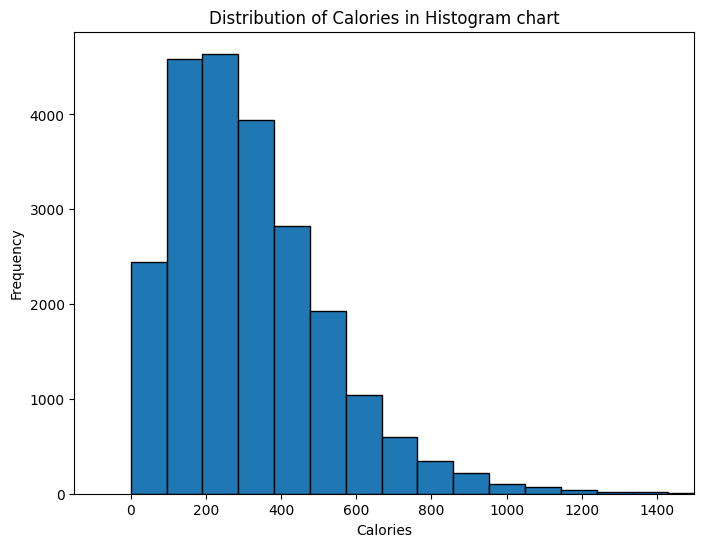

In [140]:
df_food["Calories"].plot(kind='hist', bins = 100, edgecolor='black',figsize=(8,6))

plt.title('Distribution of Calories in Histogram chart')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.xlim(-150, 1500)

plt.show()

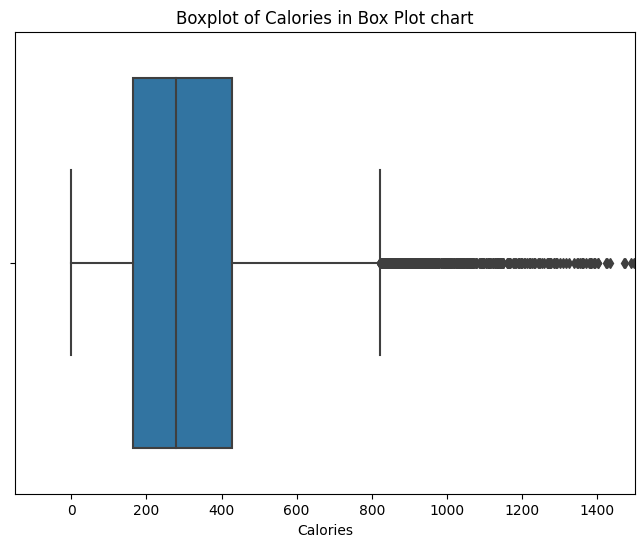

In [141]:
df_food_filtered = df_food[(df_food['Calories'] >= 0) & (df_food['Calories'] <= 1500)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_food_filtered['Calories'])

plt.title('Boxplot of Calories in Box Plot chart')
plt.xlabel('Calories')

plt.xlim(-150, 1500)

plt.show()

- Dựa vào hai biểu đồ trên, ta thấy những giá trị nằm ngoài khoảng 800 ( khoảng IQR), là những outliers. Nhưng trong bài toán mà nhóm đang hướng đến là VQA, nên các điểm ngoại lệ (như những món ăn có giá trị calo rất cao) có thể là thông tin quan trọng, ví dụ như món ăn rất giàu năng lượng. Việc loại bỏ các outliers có thể khiến mô hình thiếu đi những thông tin quý giá trong việc trả lời các câu hỏi liên quan đến calo của món ăn.

- Tuy nhiên, do tài nguyên của nhóm hạn hẹp trong việc huấn luyện mô hình, nên mục đích của nhóm là phải giảm thiểu số mẫu dữ liệu. Vậy câu hỏi được đặt ra, nên loại hoặc xóa cái nào ?

- Cách mà nhóm đề xuất là loại bỏ một phần trong mỗi bin của Histogram trong khoảng IQR là 3% cho mỗi bin. Lý do là một món ăn có thể có nhiều biến thể (nên calories sẽ gần tương tự nhau)

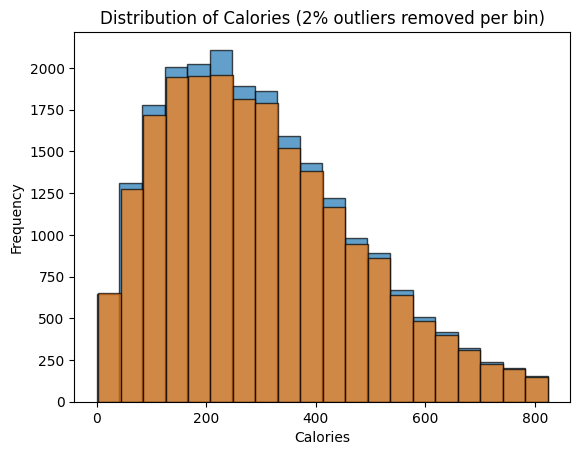

Number of samples after filtering: 21370


In [142]:
Q1 = df_food['Calories'].quantile(0.25)
Q3 = df_food['Calories'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_food_filtered = df_food[(df_food['Calories'] >= lower_bound) & (df_food['Calories'] <= upper_bound)]

n_bins = 20  
plt.hist(df_food_filtered['Calories'], bins=n_bins, edgecolor='black', alpha=0.7)

bin_edges = np.histogram_bin_edges(df_food_filtered['Calories'], bins=n_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

for i in range(n_bins):
    bin_data = df_food_filtered[(df_food_filtered['Calories'] >= bin_edges[i]) & (df_food_filtered['Calories'] < bin_edges[i + 1])]
    
    num_outliers = int(len(bin_data) * 0.02)
    
    if len(bin_data) > 0:
        bin_data_sorted = bin_data.sort_values(by='Calories')
        df_food_filtered = df_food_filtered.drop(bin_data_sorted.head(num_outliers).index)
        df_food_filtered = df_food_filtered.drop(bin_data_sorted.tail(num_outliers).index)

plt.hist(df_food_filtered['Calories'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Calories (2% outliers removed per bin)')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

print(f"Number of samples after filtering: {df_food_filtered.shape[0]}")

## Khảo sát sự phân bố của đặc trưng có dữ liệu phân loại

- Trong phần này, chúng ta sẽ tập trung khám phá sự phân bố đa dạng của các món ăn, đồng thời phân tích sự khác biệt giữa các món thuần chay và không thuần chay.
- Bên cạnh đó, nhằm nâng cao độ chính xác cho mô hình trong việc giải quyết bài toán, những hình ảnh có chất lượng thấp sẽ được đánh giá kỹ lưỡng để loại bỏ. Các bước xử lý chi tiết sẽ được trình bày trong phần tiếp theo.

### Sự phân bố của cột Answer_1, phân loại Món ăn

Đầu tiên, ta sẽ xem qua số lượng các món ăn khác nhau

In [143]:
unique_values = df_food['Answer_1'].unique()  
unique_list = list(unique_values)          
num_unique = len(unique_list)  

print(f"Số lượng các món ăn khác nhau là:", num_unique)

Số lượng các món ăn khác nhau là: 2318


- Sau đó, ta sẽ xem xét các món ăn trùng nhau có số lượng như thế nào

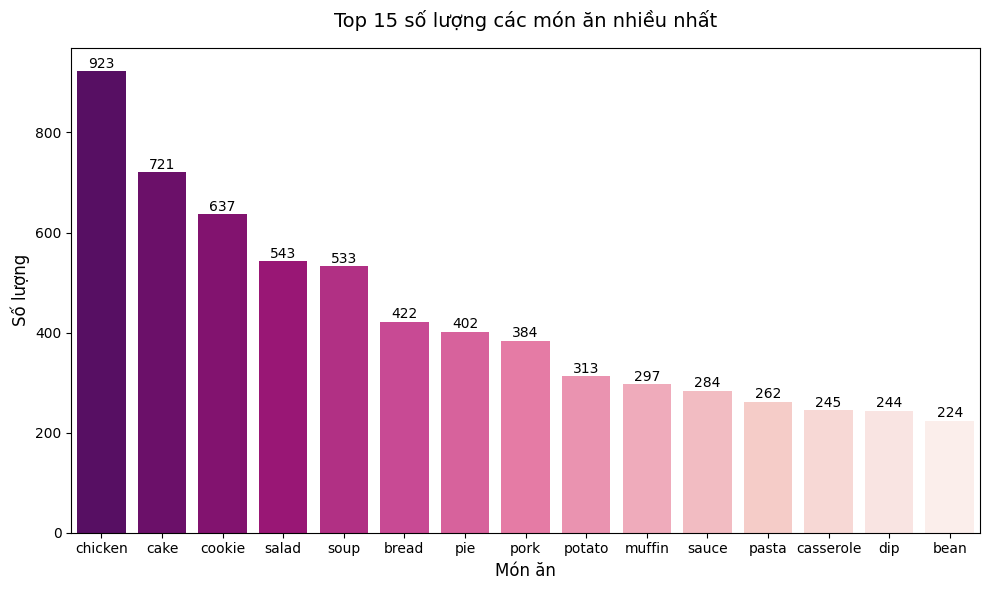

In [145]:
top_n = 15
value_counts = df_food['Answer_1'].value_counts().head(top_n)

sequential_colors = sns.color_palette("RdPu_r", 15)


plt.figure(figsize=(10, 6))  
sns.barplot(x=value_counts.index, y=value_counts.values, palette=sequential_colors)  




plt.title('Top 15 số lượng các món ăn nhiều nhất', fontsize=14, pad=15)
plt.xlabel('Món ăn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

plt.xticks(rotation=0)

for i, v in enumerate(value_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Ngoài ra, ta sẽ xem xét 15 món ăn có số lượng ít nhất là như thế nào

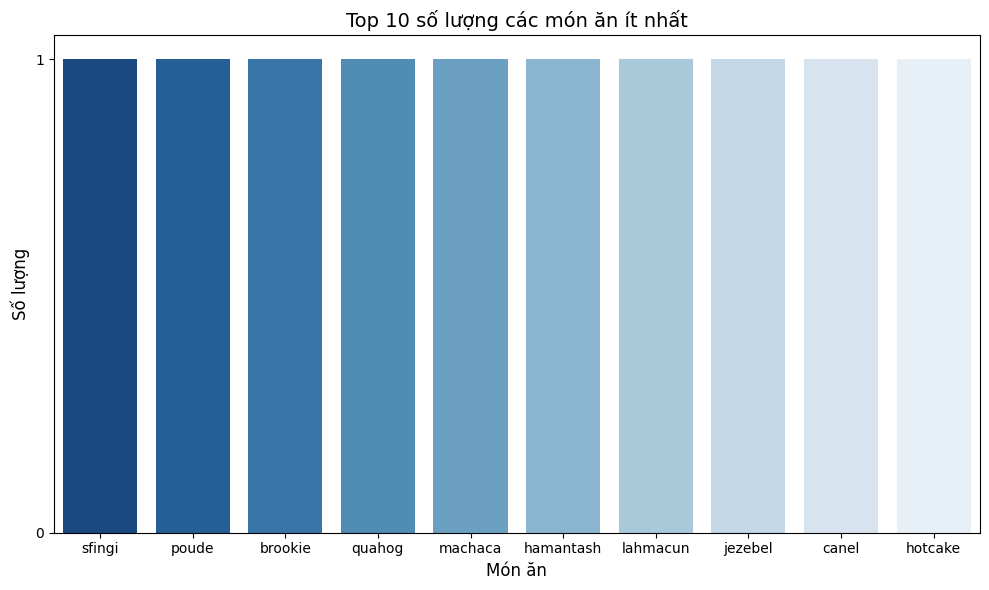

In [146]:

tail_n = 10
value_counts = df_food['Answer_1'].value_counts().tail(tail_n)

sequential_colors = sns.color_palette("Blues_r", 10)


plt.figure(figsize=(10,6))  
sns.barplot(x=value_counts.index, y=value_counts.values, palette=sequential_colors)  




plt.title('Top 10 số lượng các món ăn ít nhất', fontsize=14)
plt.xlabel('Món ăn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

plt.xticks(rotation=0)
plt.yticks()
plt.yticks(range(0, 2), fontsize=10) 

plt.tight_layout()
plt.show()

> Qua biểu đồ trên, ta nhận thấy những món như chicken, hay cake, cookie là rất nhiều. Trong khi những món jezebel, canel, quahog là rất ít. Nếu chúng ta vô tình xóa một trong những mẫu ít, thì mô hình sẽ không học được cái mới nhiều

> Hoặc nếu chúng ta xóa quá nhiều mẫu có số lượng trùng, thì mô hình sẽ không thể học kĩ càng được các tính chất trên bức ảnh của các món ăn đó

- Tiếp cận bài toán theo một hướng khác, nếu chúng ta giảm số lượng mẫu về trong khoảng 10000-11000, nếu chúng ta giữ lại những mẫu hiếm (chỉ chiếm số lượng là 1). Thì tỷ lệ này là 1 / 10000 = 0.01%, một tỷ lệ mẫu dữ liệu rất thấp để mô hình học được tốt, nhưng chúng ta khi kết hợp với các kỹ thuật tăng cường dữ liệu (data augmentation) để tạo ra nhiều biến thể từ các mẫu hiếm thì có thể làm tăng được số lượng mẫu. Nhưng để làm được điều này, cần một lượng thời gian và nguồn lực lớn!!!! Không phù hợp với bối cảnh trong project.

- Đối với những mẫu có số lượng trùng nhau lớn, ta sẽ áp dụng:
  - Kỹ thuật Undersampling: Giảm số lượng mẫu của các lớp có tần suất cao xuống ngưỡng là 100–150 mẫu
  - Lý do chọn 100–150 mẫu: Con số này đủ lớn để duy trì thông tin về đặc tính hình ảnh và câu hỏi của món ăn


- Đối với những mẫu có số lượng rất hiếm, ví dụ như từ 1-4, ta sẽ áp dụng:
  - Xóa hoàn toàn những mẫu đó, và chỉ giữ lại những mẫu có số lượng lớn hơn hoặc bằng 5


In [147]:
value_counts = df_food['Answer_1'].value_counts()

df_balanced = pd.DataFrame()

for food in value_counts[value_counts > 200].index:
    samples = df_food[df_food['Answer_1'] == food].sample(n=200, random_state=42)  
    df_balanced = pd.concat([df_balanced, samples])

for food in value_counts[(value_counts >= 5) & (value_counts <= 200)].index:
    samples = df_food[df_food['Answer_1'] == food] 
    df_balanced = pd.concat([df_balanced, samples])

df_balanced = df_balanced.reset_index(drop=True)

print("Phân bố các món ăn sau khi điều chỉnh:")
print(df_balanced['Answer_1'].value_counts())

Phân bố các món ăn sau khi điều chỉnh:
Answer_1
chicken       200
muffin        200
cake          200
shrimp        200
bean          200
             ... 
daiquiri        5
popsicle        5
mozzarella      5
elote           5
flauta          5
Name: count, Length: 539, dtype: int64


In [148]:
df_balanced

,Image,Food Name,Summary,Ingredients,Calories,Width,Height,Questions_1,Answer_1,Question_2,Answer_2
0,7fc3a3048c490e6,Juicy Roasted Chicken,This roasted chicken is perfectly seasoned and...,"['whole chicken, giblets removed', 'salt and b...",423.0,1500.0,1500.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
1,727fed34c9f7896,Pesto-Stuffed Chicken Breasts,This stuffed chicken breast recipe uses minima...,"['cooking spray', 'boneless, skinless chicken ...",418.0,3024.0,4032.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
2,26811c2091b3d67,Pineapple and Apricot Skillet Chicken,Tender chicken is paired with tangy pineapples...,"['fresh apricots, pitted and diced', 'crushed ...",375.0,960.0,960.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
3,0329f7023e5bb59,Sous Vide Chicken Breast,Cook chicken sous vide before using in any gri...,"['skinless, boneless chicken breast halves', '...",151.0,1500.0,1125.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
4,4d2674840a3c565,Chicken and Brussels Sprouts with Bacon and Po...,"Savory chicken thighs with Brussels sprouts, p...","['skin-on, bone-in chicken thighs', 'red potat...",429.0,1445.0,960.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
...,...,...,...,...,...,...,...,...,...,...,...
16812,8f62edfade91624,Beef Flautas,These beef flautas are delicious! Serve with s...,"['canola oil', 'boneless beef chuck roast, cut...",524.0,2000.0,1500.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan
16813,837d113360828ed,Crispy Flautas,I always order flautas at restaurants but have...,"['vegetable oil', 'green bell pepper, chopped'...",321.0,1024.0,768.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan
16814,ac85d2f45081245,Chicken Flautas,Chicken Flautas is a Mexican dish. If desired ...,"['skinless, boneless chicken breast halves - c...",127.0,960.0,960.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan
16815,71b8f8ed74601d7,"Beef, Chorizo, and Chile Flautas","Seasoned beef, Anaheim chiles, and cheese roll...","['Anaheim chile peppers', 'ground chuck', 'bul...",685.0,2935.0,3122.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan


In [149]:
df_food = df_balanced

### Sự phân bố của cột Width-Height

<ipython-input-150-8d305d118a23>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  width_bin_counts = df_food['Width'].groupby(width_bins).count()
<ipython-input-150-8d305d118a23>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_bin_counts = df_food['Height'].groupby(height_bins).count()
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.p

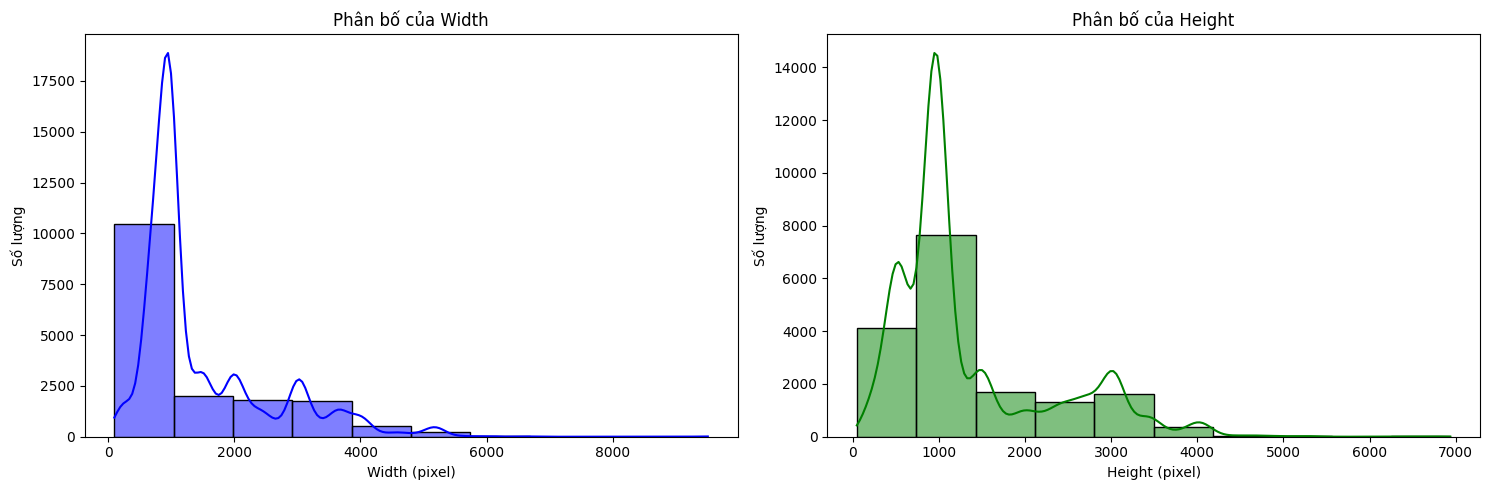

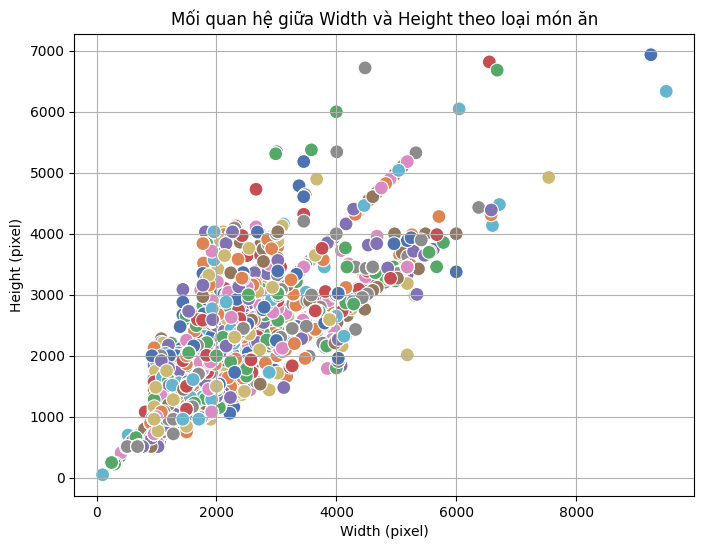

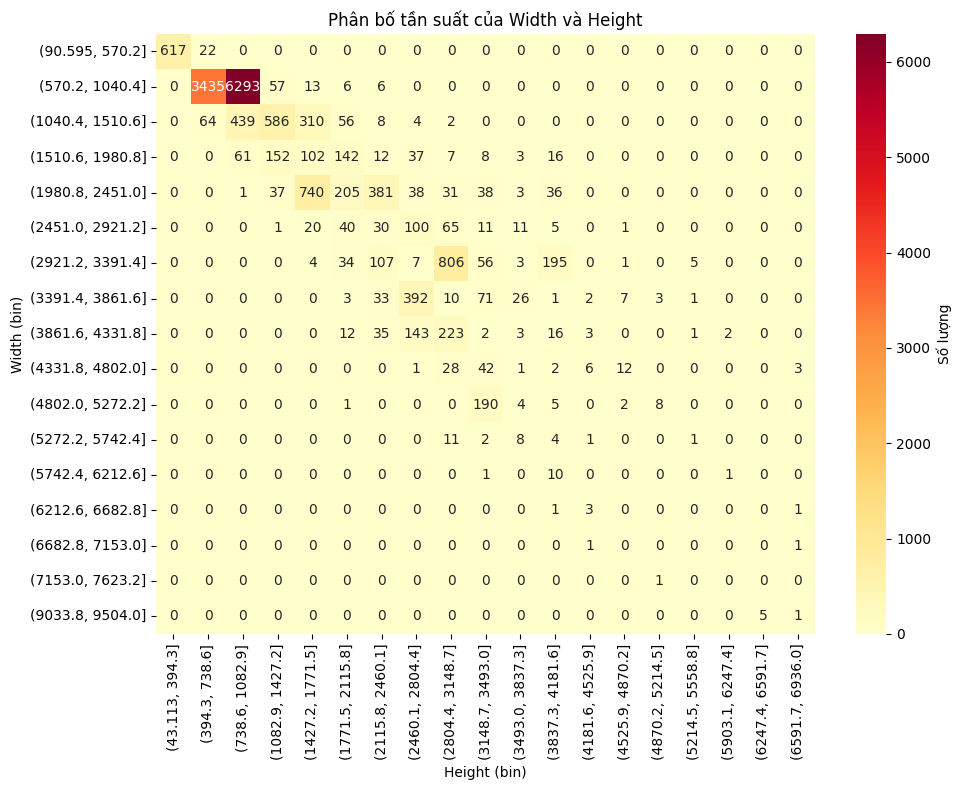

In [150]:
width_min, width_max = df_food['Width'].min(), df_food['Width'].max()
height_min, height_max = df_food['Height'].min(), df_food['Height'].max()

width_bins = pd.cut(df_food['Width'], bins=10, include_lowest=True)
height_bins = pd.cut(df_food['Height'], bins=10, include_lowest=True)

width_bin_counts = df_food['Width'].groupby(width_bins).count()
height_bin_counts = df_food['Height'].groupby(height_bins).count()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_food, x='Width', bins=10, kde=True, color='blue')
plt.title('Phân bố của Width', fontsize=12)
plt.xlabel('Width (pixel)', fontsize=10)
plt.ylabel('Số lượng', fontsize=10)

plt.subplot(1, 2, 2)
sns.histplot(data=df_food, x='Height', bins=10, kde=True, color='green')
plt.title('Phân bố của Height', fontsize=12)
plt.xlabel('Height (pixel)', fontsize=10)
plt.ylabel('Số lượng', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_food, x='Width', y='Height', hue='Answer_1', palette='deep', s=100, legend=False)
plt.title('Mối quan hệ giữa Width và Height theo loại món ăn', fontsize=12)
plt.xlabel('Width (pixel)', fontsize=10)
plt.ylabel('Height (pixel)', fontsize=10)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
width_bins_heatmap = pd.cut(df_food['Width'], bins=20, include_lowest=True)
height_bins_heatmap = pd.cut(df_food['Height'], bins=20, include_lowest=True)

pivot_table = pd.crosstab(width_bins_heatmap, height_bins_heatmap)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Số lượng'})
plt.title('Phân bố tần suất của Width và Height', fontsize=12)
plt.xlabel('Height (bin)', fontsize=10)
plt.ylabel('Width (bin)', fontsize=10)
plt.tight_layout()
plt.show()

Ta nhận thấy các hình ảnh trong bộ dữ liệu đã có chất lượng cao, do đó có thể chọn những hình ảnh có kích thước dưới 5000x5000 và thực hiện resize để tối ưu hóa mà vẫn duy trì chất lượng.

In [151]:
df_filtered = df_food[
    (df_food['Width'].between(300, 6000)) & 
    (df_food['Height'].between(300, 6000))
]

df_filtered = df_filtered.reset_index(drop=True)

In [152]:
df_filtered

,Image,Food Name,Summary,Ingredients,Calories,Width,Height,Questions_1,Answer_1,Question_2,Answer_2
0,7fc3a3048c490e6,Juicy Roasted Chicken,This roasted chicken is perfectly seasoned and...,"['whole chicken, giblets removed', 'salt and b...",423.0,1500.0,1500.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
1,727fed34c9f7896,Pesto-Stuffed Chicken Breasts,This stuffed chicken breast recipe uses minima...,"['cooking spray', 'boneless, skinless chicken ...",418.0,3024.0,4032.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
2,26811c2091b3d67,Pineapple and Apricot Skillet Chicken,Tender chicken is paired with tangy pineapples...,"['fresh apricots, pitted and diced', 'crushed ...",375.0,960.0,960.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
3,0329f7023e5bb59,Sous Vide Chicken Breast,Cook chicken sous vide before using in any gri...,"['skinless, boneless chicken breast halves', '...",151.0,1500.0,1125.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
4,4d2674840a3c565,Chicken and Brussels Sprouts with Bacon and Po...,"Savory chicken thighs with Brussels sprouts, p...","['skin-on, bone-in chicken thighs', 'red potat...",429.0,1445.0,960.0,What is the main food in the picture?,chicken,Is this dish vegetarian or non-vegetarian?,non-vegan
...,...,...,...,...,...,...,...,...,...,...,...
16178,8f62edfade91624,Beef Flautas,These beef flautas are delicious! Serve with s...,"['canola oil', 'boneless beef chuck roast, cut...",524.0,2000.0,1500.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan
16179,837d113360828ed,Crispy Flautas,I always order flautas at restaurants but have...,"['vegetable oil', 'green bell pepper, chopped'...",321.0,1024.0,768.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan
16180,ac85d2f45081245,Chicken Flautas,Chicken Flautas is a Mexican dish. If desired ...,"['skinless, boneless chicken breast halves - c...",127.0,960.0,960.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan
16181,71b8f8ed74601d7,"Beef, Chorizo, and Chile Flautas","Seasoned beef, Anaheim chiles, and cheese roll...","['Anaheim chile peppers', 'ground chuck', 'bul...",685.0,2935.0,3122.0,What is the main food in the picture?,flauta,Is this dish vegetarian or non-vegetarian?,non-vegan


In [153]:
df_food = df_filtered

### Sự phân bố của cột Answer_2, phân loại Chay-Mặn

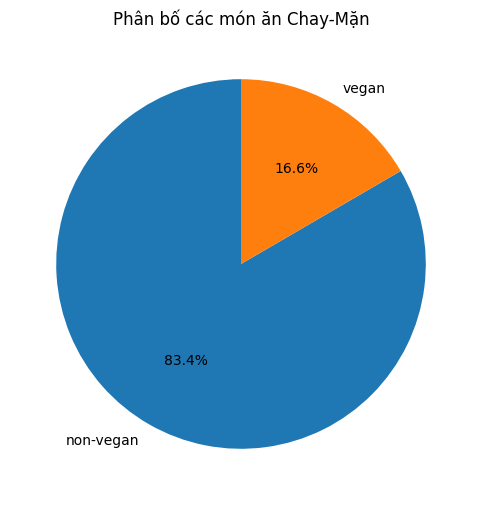

In [154]:
answer_2_counts = df_food['Answer_2'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(answer_2_counts, labels=answer_2_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố các món ăn Chay-Mặn')
plt.show()

- Nhận thấy được dữ liệu Vegan và Non-vegan đang mất cân bằng nghiêm trọng. 

- Để giảm thiểu việc bias này, cách thức chúng ta có thể sử dụng Oversampling hoặc SMOTE, tuy nhiên công sức và thời gian bỏ ra sẽ tốn rất nhiều. Tuy nhiên, mục đích của chúng ta là giảm số lượng dữ liệu xuống còn 1000-11000, nên ta sẽ quay lại bước xử lý dữ liệu món ăn để giảm thiểu số lượng lại, thay vì là 200 cho mỗi món, thì ta sẽ giảm còn 50-70

In [169]:
df_grouped = df_balanced.groupby(['Answer_1', 'Answer_2']).size().reset_index(name='count')

df_final = pd.DataFrame()

for index, row in df_grouped.iterrows():
    food_name = row['Answer_1']
    food_type = row['Answer_2']
    count = row['count']

    if food_type == 'non-vegan' and count > 20:
            samples = df_balanced[(df_balanced['Answer_1'] == food_name) & (df_balanced['Answer_2'] == food_type)]
            samples_reduced = samples.sample(n=20)
            df_final = pd.concat([df_final, samples_reduced])
    else:
        samples = df_balanced[(df_balanced['Answer_1'] == food_name) & (df_balanced['Answer_2'] == food_type)]
        df_final = pd.concat([df_final, samples])

df_final = df_final.reset_index(drop=True)
df_final


,Image,Food Name,Summary,Ingredients,Calories,Width,Height,Questions_1,Answer_1,Question_2,Answer_2
0,cc8ab18052f66ff,Pinoy Chicken Adobo,This is a family favorite from the Philippines...,"['chicken legs and thighs, rinsed and patted d...",584.0,4032.0,3024.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
1,e73d602511bd243,Pork and Chicken Adobo,This recipe is adapted from a famous Filipino ...,"['boneless pork loin roast, cut into 2-inch pi...",551.0,960.0,960.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
2,8e5cc914ad09687,Authentic Chicken Adobo,Adobo is a simple and hearty Filipino dish. In...,"['coconut vinegar', 'soy sauce', 'garlic, peel...",635.0,1536.0,1536.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
3,c5e62567a5a4266,Adobo Twist,Filipino food which everybody loves and easy t...,"['vegetable oil, or as needed', 'onion, choppe...",288.0,3024.0,3024.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
4,685234f6de463c0,Filipino Pork Adobo,Pork in a tasty Adobo sauce is great smothered...,"['distilled white vinegar', 'soy sauce', 'ketc...",337.0,3024.0,3024.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
...,...,...,...,...,...,...,...,...,...,...,...
9186,5c59892b40764fc,Zuppa Di Pesce Fra Di Avolo,Zuppa di pesce is an Italian fish stew packed ...,"['olive oil', 'sea scallops', 'large shrimp, p...",775.0,683.0,512.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan
9187,d8104fcf3c1b312,Low-Carb Zuppa Toscana,I was looking for a low-carb option of one of ...,"['Italian sausage (such as Jimmy Dean), casing...",349.0,2000.0,1500.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan
9188,23473e633d5f67c,Zuppa Toscana,"Zuppa Toscana is a creamy, comforting Italian ...","['smoked sausage', 'potatoes, cut into 1/4-inc...",459.0,683.0,512.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan
9189,49282edd4ac67dd,Zuppa di Orzo e Fagioli (Bean and Barley Soup),A hearty and filling Italian soup packed with ...,"['pearl barley', 'extra-virgin olive oil', 'pa...",536.0,960.0,960.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan


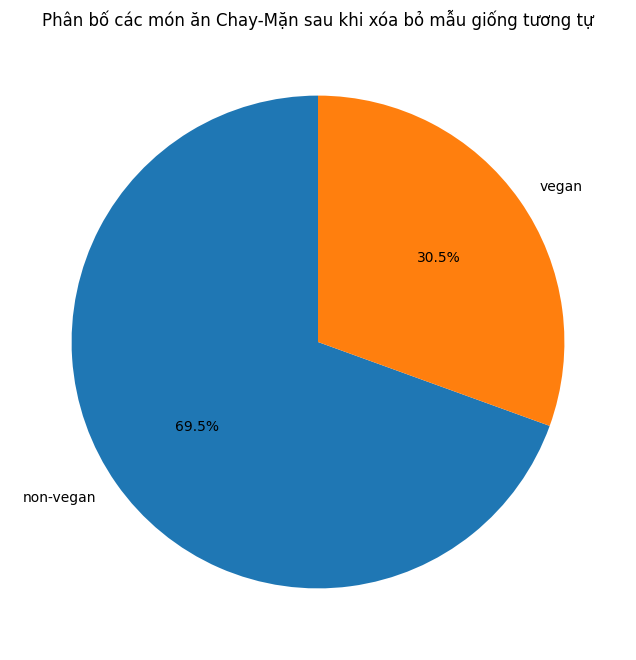

In [170]:
answer_2_counts_new = df_final['Answer_2'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(answer_2_counts_new, labels=answer_2_counts_new.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố các món ăn Chay-Mặn sau khi xóa bỏ mẫu giống tương tự')
plt.show()

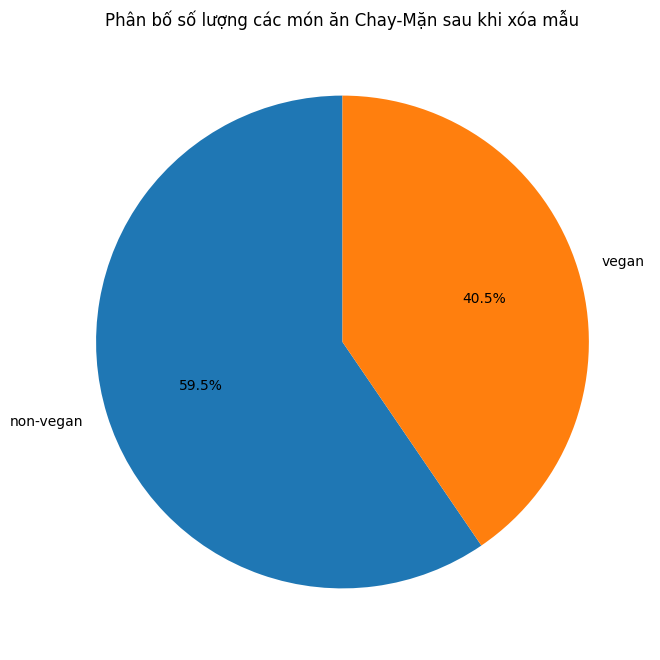

In [171]:
vegan_nonvegan_unique_counts = df_final.groupby('Answer_2')['Answer_1'].nunique()



plt.figure(figsize=(10,8))
plt.pie(vegan_nonvegan_unique_counts, labels=vegan_nonvegan_unique_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố số lượng các món ăn Chay-Mặn sau khi xóa mẫu')
plt.show()

In [172]:
df_final

,Image,Food Name,Summary,Ingredients,Calories,Width,Height,Questions_1,Answer_1,Question_2,Answer_2
0,cc8ab18052f66ff,Pinoy Chicken Adobo,This is a family favorite from the Philippines...,"['chicken legs and thighs, rinsed and patted d...",584.0,4032.0,3024.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
1,e73d602511bd243,Pork and Chicken Adobo,This recipe is adapted from a famous Filipino ...,"['boneless pork loin roast, cut into 2-inch pi...",551.0,960.0,960.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
2,8e5cc914ad09687,Authentic Chicken Adobo,Adobo is a simple and hearty Filipino dish. In...,"['coconut vinegar', 'soy sauce', 'garlic, peel...",635.0,1536.0,1536.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
3,c5e62567a5a4266,Adobo Twist,Filipino food which everybody loves and easy t...,"['vegetable oil, or as needed', 'onion, choppe...",288.0,3024.0,3024.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
4,685234f6de463c0,Filipino Pork Adobo,Pork in a tasty Adobo sauce is great smothered...,"['distilled white vinegar', 'soy sauce', 'ketc...",337.0,3024.0,3024.0,What is the main food in the picture?,adobo,Is this dish vegetarian or non-vegetarian?,non-vegan
...,...,...,...,...,...,...,...,...,...,...,...
9186,5c59892b40764fc,Zuppa Di Pesce Fra Di Avolo,Zuppa di pesce is an Italian fish stew packed ...,"['olive oil', 'sea scallops', 'large shrimp, p...",775.0,683.0,512.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan
9187,d8104fcf3c1b312,Low-Carb Zuppa Toscana,I was looking for a low-carb option of one of ...,"['Italian sausage (such as Jimmy Dean), casing...",349.0,2000.0,1500.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan
9188,23473e633d5f67c,Zuppa Toscana,"Zuppa Toscana is a creamy, comforting Italian ...","['smoked sausage', 'potatoes, cut into 1/4-inc...",459.0,683.0,512.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan
9189,49282edd4ac67dd,Zuppa di Orzo e Fagioli (Bean and Barley Soup),A hearty and filling Italian soup packed with ...,"['pearl barley', 'extra-virgin olive oil', 'pa...",536.0,960.0,960.0,What is the main food in the picture?,zuppa,Is this dish vegetarian or non-vegetarian?,non-vegan


## Lưu file sau khi tiền xử lý

In [173]:
df_final.to_csv("cleaned_recipes.csv", encoding='utf-8')